<a href="https://colab.research.google.com/github/ShubhamBhawsar2001/ML-project/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [ ]:
file=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Assignment4Dataset.csv")
file.columns=['f1','f2','label']
file.head(5)
data=file[['f1','f2']]
data['f3']=data['f1']*data['f2']
label=file[['label']]
data.head()
print(label.shape)

(5299, 1)


In [ ]:
data['f4'] = data['f1']**2
data['f5'] = data['f2']**2
data['f6'] = data['f1'] * data['f2']
data['f7'] = data['f1'] * data['f1']
data['f8'] = data['f2'] * data['f2']
data['f9'] = (data['f1'] * data['f2'] + 1)**2
data['f10'] = np.exp(-0.3*(data['f1'] - data['f2'])**2)
#this is for wTx+b (intersept)
data['b']=1
print(data)

In [ ]:

x_train=data[0:400]
y_train=label[0:400]

x_test=data[400:]
y_test=label[400:]
print (f"X_train: {x_train.shape}, y_train: {y_train.shape}")

print (f"X_test: {x_test.shape}, y_test: {y_test.shape}")



X_train: (400, 11), y_train: (400, 1)
X_test: (4899, 11), y_test: (4899, 1)


In [ ]:


def gradient(x_test,y_test,lembda,w):
  n=len(y_train)
  dw =pd.DataFrame(np.zeros(len(w)))
  for ind in range(0,n):
      distance = 1 - np.dot(y_train.iloc[[ind]] , np.dot(x_train.iloc[[ind]], w))
      if max(0, distance) == 0:
          di = lembda*w
      else:
          di = lembda*w -np.dot( y_train.iloc[[ind]] , x_train.iloc[[ind]]).transpose()
      dw += di
  dw = dw/n  # average
  return dw


(1, 11) (11, 1) (1, 1)
(1, 1)


In [ ]:


def lossvalue(x_test,y_test,lembda,w):
  loss=0
  n=len(y_train)
  
  for ind in range(0,n):
      distance = 1 - np.dot(y_train.iloc[[ind]] , np.dot(x_train.iloc[[ind]], w))
      if max(0, distance) != 0:
          loss+=distance
  loss=(loss+(lembda/2)*np.dot(w.transpose(),w))/n    
  
  return loss


In [ ]:
itr=0
m=len(y_train)
alpha=1e-2
lembda=0.8
w=np.random.randn(11,1)
wlist=[]
losslist=[]
itrlist=[]
while(itr!=300):
  y_pred=np.dot(x_train,w)
  loss=lossvalue(x_train,y_train,lembda,w)
  
  print(f"itr:{itr}, loss{loss}")
  if itr==99:
    print(f"itr:{itr}, loss{loss}")
  
  
  gw=gradient(x_train,y_train,lembda,w)
  w=w-alpha*gw
  wlist.append(w)
  itrlist.append(itr)
  losslist.append(loss[0][0])
  itr=itr+1
  print(np.dot(gw.transpose(),gw))

print(w)

itr:0, loss[[1.69387725]]
[[9.67158268]]
itr:1, loss[[1.67735646]]
[[9.49970646]]
itr:2, loss[[1.6610393]]
[[9.34831913]]
itr:3, loss[[1.64485986]]
[[9.18174165]]
itr:4, loss[[1.62899554]]
[[9.01693819]]
itr:5, loss[[1.61337473]]
[[8.83080235]]
itr:6, loss[[1.59829284]]
[[8.68188689]]
itr:7, loss[[1.58345525]]
[[8.50722516]]
itr:8, loss[[1.56913868]]
[[8.33854248]]
itr:9, loss[[1.55510694]]
[[8.20565947]]
itr:10, loss[[1.54119399]]
[[8.06647995]]
itr:11, loss[[1.52746775]]
[[7.92874954]]
itr:12, loss[[1.51391209]]
[[7.79343263]]
itr:13, loss[[1.50053468]]
[[7.66923649]]
itr:14, loss[[1.48726584]]
[[7.54701954]]
itr:15, loss[[1.47413678]]
[[7.41902427]]
itr:16, loss[[1.46113994]]
[[7.3007947]]
itr:17, loss[[1.44826575]]
[[7.17583367]]
itr:18, loss[[1.43554527]]
[[7.06147959]]
itr:19, loss[[1.4229869]]
[[6.92551204]]
itr:20, loss[[1.41090293]]
[[6.74087432]]
itr:21, loss[[1.39934424]]
[[6.58956997]]
itr:22, loss[[1.38828223]]
[[6.48455859]]
itr:23, loss[[1.37731881]]
[[6.36435869]]
itr:2

In [ ]:
pred = np.dot(x_test, w)
sum=0
for i in range(len(pred)):
  if ((pred[i][0]*y_test.iloc[i][0]) >= 0):
    sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 64.82955705245969


In [ ]:
pred = np.dot(x_train, w)
sum=0
for i in range(len(pred)):
  if ((pred[i][0]*y_train.iloc[i][0]) >= 0):
    sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 67.0


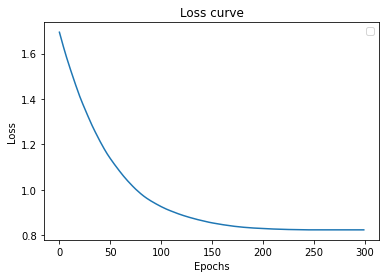

In [ ]:
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")



plt.plot(itrlist, losslist)
plt.legend()
plt.show()